# <center>CHALLENGE 5<center>

<p>Team Name: Parasyte
<p>Student Names: Abby Ortego, Catherine Nixon
<p>Student W#s: W0716476, W0704280

## Instructions
Use generic coding style unless hard-coded values are really necessary.<br>
Your code must be efficient and use self-explanatory naming.<br>
Use appropriate Python library methods for each task instead of using loops.<br>
Run your entire code and save <b>BEFORE</b> submitting. Then, submit this <b>saved</b> copy.

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from mpl_toolkits import mplot3d

## Loading Data

Read Data file to get vectors/points {V,U,R,Z,A,B,C,D,P,Q,S,T}:

In [3]:
data = pd.DataFrame(pd.read_csv('INPUT/Data.csv')).set_index(['VECTOR'])
display(data)

,X1,X2,X3
VECTOR,,,
V,8,4,0
U,5,7,0
R,4,-2,0
Z,6,2,0
A,2,-3,0
B,6,4,0
C,-1,5,0
D,4,-4,0
P,8,4,0


## Matrix and Vector Operations

Verify if true: [V.(U + R)].A = (V.U + V.R).A = V.[(U + R).A]:<br>
ans_1 = [V.(U + R)].A<br>
ans_2 = (V.U + V.R).A<br>
ans_3 = V.[(U + R).A]<br>

Note: The operator "." is defined as a "dot product" if it is for two vectors or as a "scalar multiplication" otherwise.

In [4]:
ans_1 = (data.loc['V'].dot(data.loc['U'] + data.loc['R']) * data.loc['A']).sum()
print(ans_1)

-92


In [5]:
ans_2 = ((data.loc['V'].dot(data.loc['U']) + data.loc['V'].dot(data.loc['R'])) * data.loc['A']).sum()
print(ans_2)

-92


In [6]:
ans_3 = (data.loc['V'] * (data.loc['U'] + data.loc['R']).dot(data.loc['A'])).sum()
print(ans_3)

36


Write a function unitVec(Vs) to find unit vectors of the set Vs. Test your code to find unit vectors of U and V:

In [7]:
def unitVec(Vs):
    return([vector / np.linalg.norm(vector) for vector in Vs])
#

print('Unit Vectors:', unitVec([data.loc['U'], data.loc['V']]))

Unit Vectors: [X1    0.581238
X2    0.813733
X3    0.000000
Name: U, dtype: float64, X1    0.894427
X2    0.447214
X3    0.000000
Name: V, dtype: float64]


Write a function angleVec(Vs) to find the angle between two vectors of the set Vs. Test your code to find the angle between the unit vectors of U and V:

In [8]:
def angleVec(Vs):
    unit_vec = unitVec(Vs)
    angle = {'Name': unit_vec[0].name + unit_vec[1].name, 'Angle': np.degrees(np.arccos(unit_vec[0].dot(unit_vec[1])))}
    
    return angle
#

print('Angle Between Vectors:', angleVec([data.loc['U'], data.loc['V']]))

Angle Between Vectors: {'Name': 'UV', 'Angle': 27.89727103094763}


Write a function orthogon(Vs) to determine orthogonality of set of vectors Vs. Test your code using SV = {V, U, R, A, B}:

In [9]:
def orthogon(Vs):
    #make the combos
    Vs_combos = itertools.combinations(Vs, 2)
    
    #use angleVec to get angles between the set of vecs
    Vs_angles = [angleVec(combo) for combo in Vs_combos]
    
    #determine orthogonality
    orthogon_truthVal = [{'Name' : angle['Name'], 'Orthogon': True if int(angle['Angle']) == 90 else False} 
                         for angle in Vs_angles] #name of angle and its orthogonality
    
    return orthogon_truthVal
#
print('Orthogonality:', orthogon([data.loc['V'], data.loc['U'], data.loc['R'], data.loc['A'], data.loc['B']]))

Orthogonality: [{'Name': 'VU', 'Orthogon': False}, {'Name': 'VR', 'Orthogon': False}, {'Name': 'VA', 'Orthogon': False}, {'Name': 'VB', 'Orthogon': False}, {'Name': 'UR', 'Orthogon': False}, {'Name': 'UA', 'Orthogon': False}, {'Name': 'UB', 'Orthogon': False}, {'Name': 'RA', 'Orthogon': False}, {'Name': 'RB', 'Orthogon': False}, {'Name': 'AB', 'Orthogon': True}]


Write a function plotVec(Vs) to plot vectors Vs in different colors:

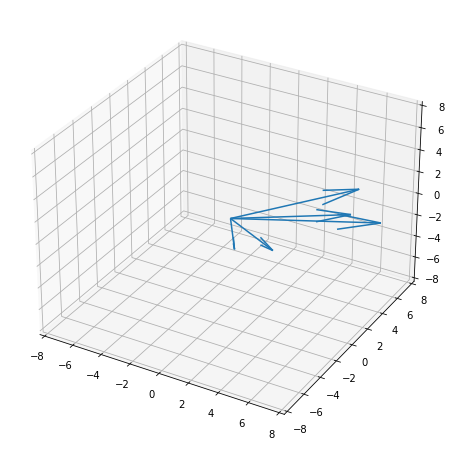

In [56]:
def plotVec(Vs):
    #get x,y,z coordinate
    x_axis = [vector.X1 for vector in Vs]
    y_axis = [vector.X2 for vector in Vs]
    z_axis = [vector.X3 for vector in Vs]
    
    fig = plt.figure(figsize = (8,8)) 
    ax = plt.axes(projection="3d")
    
    #set the axes
    ax.set_xlim([-8, 8])
    ax.set_ylim([-8, 8])
    ax.set_zlim([-8, 8])
    
    #plot
    ax.quiver(0,0,0, x_axis, y_axis, z_axis)
    plt.show()

#

plotVec([data.loc['V'], data.loc['U'], data.loc['R'], data.loc['A'], data.loc['B']])

Write a function projectVec(Vs) to find projection vector Vp of V1 on V2; Vs = (V1, V2). Test your code to find projection vector Zr of Z on R (component of Z in the direction of R):

In [11]:
def projectVec(Vs): 
    projVs1_Vs2 = (np.dot(Vs[0], Vs[1]) / np.dot(Vs[1], Vs[1])) * Vs[1]
    return projVs1_Vs2
#

Zr = projectVec([data.loc['Z'], data.loc['R']])
print(Zr)

X1    4.0
X2   -2.0
X3    0.0
Name: R, dtype: float64


Plot Z, R, Zr in different colors using your function plotVec(Vs):

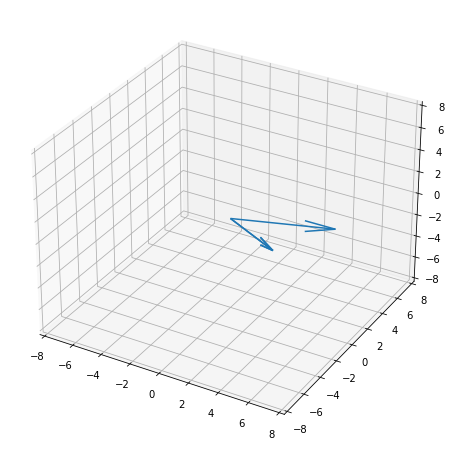

In [12]:
plotVec([data.loc['Z'], data.loc['R'], Zr])

Write a function linearDependence(Vs) to determine independence of a set Vs of vectors. Test your code using the set of vectors St = {V, U, R, A, B, C}:

In [85]:
def linearDependence(Vs):
    Vs_len = len(Vs) #number of vectors
    Vs_vec_len = max([len(vector) for vector in Vs]) #max number of components in each vector
    
    if(Vs_len > Vs_vec_len): 
        return True
    else:
        return False
#

print(linearDependence([data.loc['V'], data.loc['U'], data.loc['R'], data.loc['A'], data.loc['B'], data.loc['C']]))

True


Write a function lineEqn(Vs) to define the equation of the line which passes through two points Vs = {P0,P1} and to plot some points on the line. Test your code using the points D and C. Also, plot 10 successive points on this line using the parameter "t" 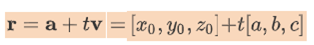:

Write a function distanceVec(Vs) to calculate the distance from a point P0 to a plane defined by three points {P1,P2,P3}; Vs = (P0,P1,P2,P3). Test your code using the set of points on the plane Plane = {P, Q, S} and the point T:

## <center> REFERENCES </center>
List resources (book, internet page, etc.) that you used to complete this challenge.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
https://pandas.pydata.org/docs/reference/api/pandas.Series.values.html
https://www.geeksforgeeks.org/itertools-combinations-module-python-print-possible-combinations/
https://numpy.org/doc/stable/reference/routines.linalg.html
https://stackoverflow.com/questions/4260280/if-else-in-a-list-comprehension